# my actual code is below `Scroll down`
### [Mark Henry]

In [8]:
import numpy as np

import pandas as pd

import yfinance as yf

from tabulate import tabulate

import scipy

import matplotlib.pyplot as plt

import seaborn

import matplotlib.mlab as mlab

from scipy.stats import norm

import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")

start= '2023-01-01'

df = yf.download("MPC", start, "2024-02-01")

df= df[['Close']]

df['returns'] = df.Close.pct_change()

df['returns'] ##daily returns 

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-03         NaN
2023-01-04   -0.003065
2023-01-05    0.046573
2023-01-06    0.009418
2023-01-09   -0.009074
                ...   
2024-01-25    0.013991
2024-01-26    0.020665
2024-01-29   -0.002367
2024-01-30    0.060884
2024-01-31   -0.025252
Name: returns, Length: 271, dtype: float64

In [9]:
mean = np.mean(df['returns'])

mean ##average daily returns

0.0016696275046774586

In [10]:
std_dev = np.std(df['returns'])

std_dev #average deviation in returns 

0.019184181789539186

In [11]:
l_new= round(stats.norm.ppf(-.05,mean,std_dev)*100,2)

In [12]:
l_new

nan

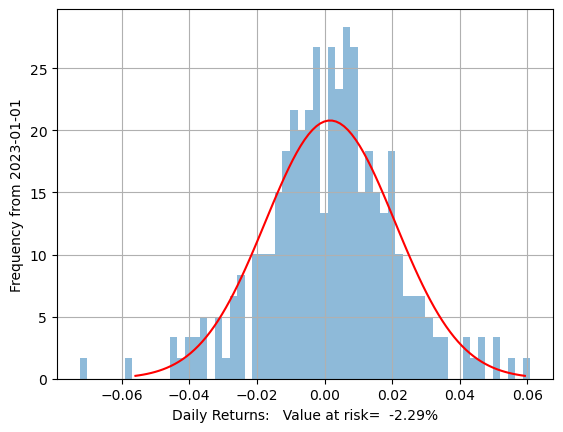

In [13]:
df['returns'].hist(bins=60, density=True, histtype = 'stepfilled', alpha=0.5)
x = np.linspace(mean -3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x,mean,std_dev), "r", )
plt.xlabel(f'Daily Returns:   Value at risk=  {loss}%')
plt.ylabel(f'Frequency from {start}')
plt.show()

In [14]:
loss= round(x.mean()*100,2)
print(f'Percentage Loss: {loss}%')

Percentage Loss: 0.17%


In [15]:
x = np.linspace(mean -3*std_dev, mean + 3*std_dev, 100)

In [16]:
x

array([-5.58829179e-02, -5.47202402e-02, -5.35575625e-02, -5.23948848e-02,
       -5.12322071e-02, -5.00695294e-02, -4.89068518e-02, -4.77441741e-02,
       -4.65814964e-02, -4.54188187e-02, -4.42561410e-02, -4.30934633e-02,
       -4.19307857e-02, -4.07681080e-02, -3.96054303e-02, -3.84427526e-02,
       -3.72800749e-02, -3.61173972e-02, -3.49547195e-02, -3.37920419e-02,
       -3.26293642e-02, -3.14666865e-02, -3.03040088e-02, -2.91413311e-02,
       -2.79786534e-02, -2.68159758e-02, -2.56532981e-02, -2.44906204e-02,
       -2.33279427e-02, -2.21652650e-02, -2.10025873e-02, -1.98399097e-02,
       -1.86772320e-02, -1.75145543e-02, -1.63518766e-02, -1.51891989e-02,
       -1.40265212e-02, -1.28638435e-02, -1.17011659e-02, -1.05384882e-02,
       -9.37581050e-03, -8.21313281e-03, -7.05045513e-03, -5.88777744e-03,
       -4.72509976e-03, -3.56242207e-03, -2.39974439e-03, -1.23706671e-03,
       -7.43890216e-05,  1.08828866e-03,  2.25096635e-03,  3.41364403e-03,
        4.57632172e-03,  

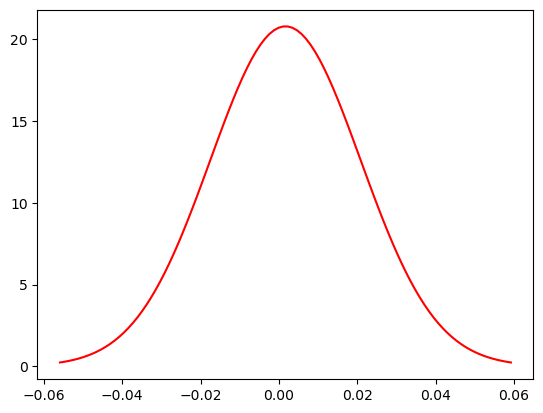

In [17]:
plt.plot(x, scipy.stats.norm.pdf(x,mean,std_dev), "r")
plt.show()

[*********************100%%**********************]  1 of 1 completed

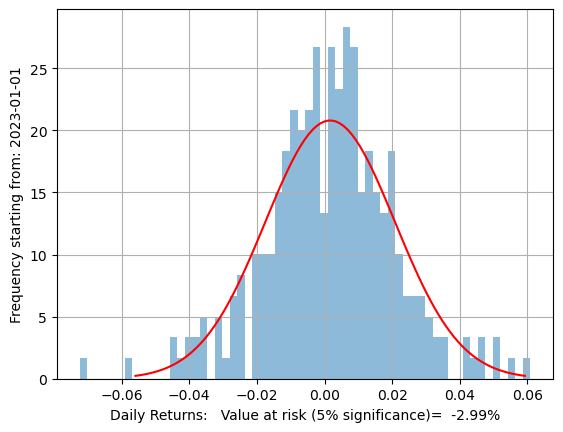

Percentage Loss (Value at Risk at 5% significance level): -2.99%


In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

start = '2023-01-01'

df = yf.download("mpc", start, "2024-02-01")
df = df[['Close']]
df['returns'] = df.Close.pct_change()

mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])
# Calculate VaR
loss = round(stats.norm.ppf(0.05, mean, std_dev) * 100, 2)

df['returns'].hist(bins=60, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
plt.plot(x, stats.norm.pdf(x, mean, std_dev), "r")
plt.xlabel(f'Daily Returns:   Value at risk (5% significance)=  {loss}%')
plt.ylabel(f'Frequency starting from: {start}')



plt.show()

print(f'Percentage Loss (Value at Risk at 5% significance level): {loss}%')
